<a href="https://colab.research.google.com/github/kanedc/Learning_Pytorch/blob/main/k_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#START


In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


In [2]:
import torch
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
#获得张量的维度数
scalar.ndim

0

In [4]:
#将张量作为Python整型返回
scalar.item()

7

In [5]:
#vector
vector = torch.tensor([5,5])
vector


tensor([5, 5])

In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
#MATRIX
MATRIX = torch.tensor([[2,3],[4,5]])
MATRIX

tensor([[2, 3],
        [4, 5]])

In [9]:
#tensor
TENSOR = torch.tensor([[[1,2,3],[1,2,3],[7,7,7]],[[3,6,3],[1,3,5],[7,7,7]]])
TENSOR

tensor([[[1, 2, 3],
         [1, 2, 3],
         [7, 7, 7]],

        [[3, 6, 3],
         [1, 3, 5],
         [7, 7, 7]]])

In [10]:
TENSOR.ndim

3

In [11]:
TENSOR.shape

torch.Size([2, 3, 3])

In [12]:
#Float 32 tensor
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                 dtype = None,
                 device = None,
                 requires_grad = False)
float_32_tensor

tensor([3., 6., 9.])

In [13]:
float_16_tensor = float_32_tensor.type(torch.half)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [14]:
float_32_tensor * float_16_tensor

tensor([ 9., 36., 81.])

In [15]:
int_32_tensor = torch.tensor([3,6,9],dtype=torch.long)
int_32_tensor
int_32_tensor.shape

torch.Size([3])

### 从张量中获取信息  （张量的属性）

1 张量的数据类型不正确 -- 从张量中获取数据类型，可以使用tensor.dtype

2 张量的形状不正确 --- 从张量中获得形状信息，使用tensor.shape

3 张量的设备不正确 --- 从张量中获取设备信息，使用tensor.device

In [16]:
some_tensor = torch.rand(5,7)
some_tensor

tensor([[0.1262, 0.2836, 0.8180, 0.1385, 0.9383, 0.7057, 0.6596],
        [0.9791, 0.9016, 0.9681, 0.8128, 0.6856, 0.0414, 0.2047],
        [0.6891, 0.7274, 0.7035, 0.4344, 0.0217, 0.3535, 0.5551],
        [0.2473, 0.0072, 0.0875, 0.6507, 0.7942, 0.0205, 0.3907],
        [0.5993, 0.1879, 0.7108, 0.1480, 0.7608, 0.5030, 0.2948]])

In [17]:
print(some_tensor)
print(f"Datatype of tensor:{some_tensor.dtype}")
print(f"Shape of tensor:{some_tensor.shape}")
print(f"Device of tensor:{some_tensor.device}")

tensor([[0.1262, 0.2836, 0.8180, 0.1385, 0.9383, 0.7057, 0.6596],
        [0.9791, 0.9016, 0.9681, 0.8128, 0.6856, 0.0414, 0.2047],
        [0.6891, 0.7274, 0.7035, 0.4344, 0.0217, 0.3535, 0.5551],
        [0.2473, 0.0072, 0.0875, 0.6507, 0.7942, 0.0205, 0.3907],
        [0.5993, 0.1879, 0.7108, 0.1480, 0.7608, 0.5030, 0.2948]])
Datatype of tensor:torch.float32
Shape of tensor:torch.Size([5, 7])
Device of tensor:cpu


### 张量运算 （manipulation tensor）

张量运算：加 减 乘 除 矩阵乘法（点乘）

torch.add
torch.sub
torch.mul
tensor.div
tensor.matmul


###执行矩阵乘法需要满足的两个主要规则：

 内部维度必须匹配  (3,2) @ (2,3)

 得到的矩阵具有外部维度的形状 （3,2）@ （2,3）---> （3,3）

In [18]:
a=torch.Tensor([1,2,3])
b=torch.Tensor([4,5,6])
#逐元素相乘（element-wise product）
print(torch.mul(a,b))
print(f"* : {a * b}")

tensor([ 4., 10., 18.])
* : tensor([ 4., 10., 18.])


In [19]:
#点乘 内积 数量积 矩阵乘法
print(f"dot : {torch.dot(a,b)}")
print(f"@ : {a @ b}")
print(f"matmul : {torch.matmul(a,b)}")#matmul方法 支持1D到nD张量，广义矩阵乘法
c=torch.tensor([[3,2],[5,6],[7,8]])
d=torch.tensor([[1,2],[3,4],[1,2]])
print(f"{c.shape} ,{d.shape}")
#print(f"mm : {torch.mm(c,d)}")# mm方法 仅支持二维矩阵，矩阵乘法
print(f"mm : {torch.mm(c,d.T)}")#Transpose - 转置
print(f"mm : {torch.mm(c,d.T).shape}")
print(f"inner : {torch.inner(a,b)}")

dot : 32.0
@ : 32.0
matmul : 32.0
torch.Size([3, 2]) ,torch.Size([3, 2])
mm : tensor([[ 7, 17,  7],
        [17, 39, 17],
        [23, 53, 23]])
mm : torch.Size([3, 3])
inner : 32.0


###在深度学习中最常见的错误之一： 形状错误

In [20]:
c=torch.tensor([[3,2],[5,6],[7,8]])
d=torch.tensor([[1,2],[3,4],[1,2]])
print(f"{c.shape} ,{d.shape}")
#print(f"mm : {torch.mm(c,d)}")
print(f"mm : {torch.mm(c,d.T)}")#Transpose - 转置

torch.Size([3, 2]) ,torch.Size([3, 2])
mm : tensor([[ 7, 17,  7],
        [17, 39, 17],
        [23, 53, 23]])


###找到最小值 最大值 平均值 求和 等 张量聚合

In [21]:
#创建一个张量
a=torch.arange(0,10,1)
a,a.dtype

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.int64)

In [22]:
#找最小值
print(f"min : {torch.min(a)}")
print(f"min : {a.min()}")
#找最大值
print(f"max : {torch.max(a)}")
print(f"max : {a.max()}")
#找平均值 :torch.mean() 函数 需要一个float32数据类型的张量作为参数才能正常工作
print(f"mean : {torch.mean(a.type(torch.float32))}")

min : 0
min : 0
max : 9
max : 9
mean : 4.5


###找到最大值和最小值所在的位置

In [23]:
a
#找到张量中最大值的位置
print(f"argmax : {torch.argmax(a)}")
#找到张量中最小值的位置
print(f"argmin : {torch.argmin(a)}")

argmax : 9
argmin : 0


###重塑，堆叠，压缩和解压张量

Reshaping - 将输入张量重塑为定义的形状

View - 返回特定形状的输入张量的视图，但保持与原始张量相同的内存

Stacking - 将多个张量彼此叠加(vstack)或并排组合

Sqeeze - 从tensor中移除所有 1 维度

Unsqeeze - 将 1 维度添加到目标tensor

Permute - 返回以特定方式排列维度的输入视图

In [24]:
#stack
a_stack = torch.stack([a,a,a,a],dim=0)
a_vstack = torch.vstack([a,a,a,a])

a1_stack = torch.stack([a,a,a,a],dim=1)
a1_hstack = torch.hstack([a,a,a,a])

#a_stack,a1_stack
#a_vstack,a1_hstack
a_stack == a1_stack.T

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [25]:
#
x = torch.zeros(2,1,2,1,2)
#x,x.shape

y = torch.squeeze(x)
#y,y.shape

z = torch.unsqueeze(y,0)
z,z.shape

(tensor([[[[0., 0.],
           [0., 0.]],
 
          [[0., 0.],
           [0., 0.]]]]),
 torch.Size([1, 2, 2, 2]))

In [26]:
x = torch.randn(2,3,5)
x,x.shape
#torch.permute 按照特定顺序重新排列目标张量的维度
torch.permute(x,(2,0,1)).shape#移动轴 2->0,0->1,1->2


torch.Size([5, 2, 3])

In [27]:
tensor = torch.tensor([[[1,2,3],[2,3,4],[3,4,5]],[[11,22,33],[22,33,44],[33,44,55]]])
#tensor,tensor.shape
# print(tensor)
# print(tensor[1][0])
# print(tensor[1][0][1])
# print(tensor[:,:,1])
# print(tensor[:,1,1])
print(tensor[:,:,2])
print(tensor[0][:][2])


tensor([[ 3,  4,  5],
        [33, 44, 55]])
tensor([3, 4, 5])


In [28]:
#Numpy 和 Pytorch
import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
#tensor = torch.from_numpy(array).type(torch.float32)#更改数据类型
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [29]:
tensor.dtype

torch.float64

###Numpy和Tensor不共享内存

In [30]:
#改变数组的值，张量的值不变
array = array + 1
array,tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [31]:
#tensor转换为Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor,numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [32]:
#改变数组的值，张量的值不变
tensor = tensor + 1
tensor,numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

###Reproducbility(可重复性） 试图从随机数中取出随机数

简而言之，怎么学习神经网络:

  `从随机数开始-->张量运算-->更新随机数尝试让他们成为数据-->不断重复过程

在神经网络中为了减少随机性，Pytorch引入了 随机种子 的概念。本质上来说，随机种子就像是给随机性加了“调味料”，让随机过程可控、可复现

随机和伪随机



In [33]:
import torch

#创建两个随机张量
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)


tensor([[0.8896, 0.5959, 0.0261, 0.8193],
        [0.5498, 0.7028, 0.7044, 0.4936],
        [0.3497, 0.3806, 0.5944, 0.6460]])
tensor([[0.5490, 0.9988, 0.8542, 0.5850],
        [0.9222, 0.1326, 0.2993, 0.3148],
        [0.2204, 0.5587, 0.0658, 0.8287]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [34]:
#创建一些随机但可重复性的张量
import torch

#设置随机种子
RANDOM_SEED = 32

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)


tensor([[0.8757, 0.2721, 0.4141, 0.7857],
        [0.1130, 0.5793, 0.6481, 0.0229],
        [0.5874, 0.3254, 0.9485, 0.5219]])
tensor([[0.8757, 0.2721, 0.4141, 0.7857],
        [0.1130, 0.5793, 0.6481, 0.0229],
        [0.5874, 0.3254, 0.9485, 0.5219]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


###Random tensor
 **why random tensor ?**


随机张量很重要，因为许多神经网络的学习方式是从充满随机数的张量开始，然后调整这些随机数以更好地表示数据。

`从随机数开始---》看数据 ---》更新随机数---》看数据 ---》更新随机数`



In [35]:
#创建一个大小为（10,10）的随机张量
random_tensor = torch.rand(1,10,10)
random_tensor

tensor([[[0.8782, 0.7254, 0.6929, 0.0259, 0.9319, 0.0913, 0.7177, 0.7271,
          0.4967, 0.9308],
         [0.3677, 0.2049, 0.6646, 0.3886, 0.0787, 0.1447, 0.1809, 0.6440,
          0.1504, 0.7280],
         [0.8867, 0.2971, 0.7828, 0.5105, 0.8187, 0.4370, 0.1878, 0.8781,
          0.1925, 0.6161],
         [0.7849, 0.1381, 0.0455, 0.7794, 0.0059, 0.1268, 0.7167, 0.3324,
          0.8529, 0.3920],
         [0.5805, 0.2238, 0.5989, 0.0382, 0.1198, 0.1159, 0.5589, 0.4112,
          0.9977, 0.5187],
         [0.9310, 0.2028, 0.6240, 0.4142, 0.9531, 0.6668, 0.5360, 0.1804,
          0.0755, 0.3405],
         [0.7576, 0.2296, 0.2900, 0.0625, 0.9716, 0.9518, 0.2123, 0.5161,
          0.4722, 0.5887],
         [0.1751, 0.1881, 0.4266, 0.1156, 0.5557, 0.2444, 0.1048, 0.4753,
          0.2905, 0.7066],
         [0.9065, 0.2047, 0.3438, 0.4117, 0.0127, 0.0150, 0.6994, 0.4675,
          0.2444, 0.9778],
         [0.0017, 0.9419, 0.0226, 0.2056, 0.7737, 0.3734, 0.3499, 0.1588,
          0.6527,

In [36]:
random_tensor.ndim

3

In [37]:
random_tensor.shape

torch.Size([1, 10, 10])

In [38]:
#创建一个和图像张量相似的随机张量
random_image_size_tensor = torch.rand(3,224,224) #第一个参数为颜色通道数，其后的两个参数为图片的高和宽
random_image_size_tensor.ndim, random_image_size_tensor.shape

(3, torch.Size([3, 224, 224]))

###Zeros and Ones

In [39]:
#创建一个全0的张量
zeros = torch.zeros(size=(3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [40]:
#创建一个全1的张量
ones = torch.ones(size=(7,7))
ones

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])

In [41]:
ones.dtype, random_tensor.dtype

(torch.float32, torch.float32)

###在GPU上运行张量和PyTorch对象

In [42]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [43]:
#使用PyTorch检查GPU访问权限

import torch
torch.cuda.is_available()


False

###设置设备无关代码 (Device-agnostic code)

由于 PyTorch 的结构，您可能需要明确编写与设备无关（CPU 或 GPU）的代码；一个例子可能是创建一个新的张量作为循环神经网络的初始隐藏状态。

第一步是确定是否应该使用 GPU

In [44]:
#设置设备无关代码 (Device-agnostic code)
#device = torch.accelerator.current_accelerator().type if torch.cuda.is_availiable() else "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [45]:
#统计设备数量
torch.cuda.device_count()

0

###将Tensor放到GPU上

In [46]:
#创建一个张量（默认是cpu）
tensor = torch.tensor([1,2,3])

#Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [47]:
#将tensor移动到GPU（if avaliable）
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

In [48]:
#将tensor移回CPU

#如果tensor在GPU上，不能将其装换为NumPy
tensor_on_gpu.numpy()

array([1, 2, 3])

In [49]:
#修复GPU tensor 与Numpy的问题，我们首先设置tensor到CPU上

tensor_back_on_cpu=tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [50]:
tensor_on_gpu

tensor([1, 2, 3])

##Exercises

In [51]:
#2 创建一个形状为（7,7）的随机张量
#rand--均匀分布   randn --- 标准正态分布
random_tensor_2 = torch.rand(7,7)
random_tensor

tensor([[[0.8782, 0.7254, 0.6929, 0.0259, 0.9319, 0.0913, 0.7177, 0.7271,
          0.4967, 0.9308],
         [0.3677, 0.2049, 0.6646, 0.3886, 0.0787, 0.1447, 0.1809, 0.6440,
          0.1504, 0.7280],
         [0.8867, 0.2971, 0.7828, 0.5105, 0.8187, 0.4370, 0.1878, 0.8781,
          0.1925, 0.6161],
         [0.7849, 0.1381, 0.0455, 0.7794, 0.0059, 0.1268, 0.7167, 0.3324,
          0.8529, 0.3920],
         [0.5805, 0.2238, 0.5989, 0.0382, 0.1198, 0.1159, 0.5589, 0.4112,
          0.9977, 0.5187],
         [0.9310, 0.2028, 0.6240, 0.4142, 0.9531, 0.6668, 0.5360, 0.1804,
          0.0755, 0.3405],
         [0.7576, 0.2296, 0.2900, 0.0625, 0.9716, 0.9518, 0.2123, 0.5161,
          0.4722, 0.5887],
         [0.1751, 0.1881, 0.4266, 0.1156, 0.5557, 0.2444, 0.1048, 0.4753,
          0.2905, 0.7066],
         [0.9065, 0.2047, 0.3438, 0.4117, 0.0127, 0.0150, 0.6994, 0.4675,
          0.2444, 0.9778],
         [0.0017, 0.9419, 0.0226, 0.2056, 0.7737, 0.3734, 0.3499, 0.1588,
          0.6527,

In [52]:
#3 对来自2的张量与另一个具有形状的随机张量执行矩阵乘法（1,7）
random_tensor_3 = torch.rand(1,7)
mat_mul_1 = torch.matmul(random_tensor_2,random_tensor_3.T)
mat_mul_2 = random_tensor_2 @ random_tensor_3.T
mat_mul_3 = random_tensor_2.matmul(random_tensor_3.T)

print(mat_mul_1)
print(mat_mul_2)
print(mat_mul_3)


tensor([[1.8538],
        [1.6842],
        [1.3328],
        [2.3680],
        [2.0185],
        [2.1623],
        [2.3510]])
tensor([[1.8538],
        [1.6842],
        [1.3328],
        [2.3680],
        [2.0185],
        [2.1623],
        [2.3510]])
tensor([[1.8538],
        [1.6842],
        [1.3328],
        [2.3680],
        [2.0185],
        [2.1623],
        [2.3510]])


In [53]:
#4 将随机数种子设置为0并重复练习2和3
RANDOM_SEED = 0

torch.manual_seed(RANDOM_SEED)
random_tensor_2 = torch.rand(7,7)
torch.manual_seed(RANDOM_SEED)
random_tensor_3 = torch.rand(1,7)

print(random_tensor_2)
print(random_tensor_3)

mat_mul_1 = torch.matmul(random_tensor_2,random_tensor_3.T)
#mat_mul_2 = random_tensor_2 @ random_tensor_3.T
#mat_mul_3 = random_tensor_2.matmul(random_tensor_3.T)

print(mat_mul_1)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]])
tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])


In [54]:
#5 说到随机种子，我们了解了如何使用torch.manual_seed()来设置它，但有没有GPU等效的函数呢？
#（提示：你需要查看torch.cuda这方面的文档）。如果有，请将GPU随机种子设置为1234。

#GPU上存在等效函数 为 manual_seed
RANDOM_SEED = 1234

torch.cuda.manual_seed(RANDOM_SEED)
random_tensor_2 = torch.rand(7,7)
torch.cuda.manual_seed(RANDOM_SEED)
random_tensor_3 = torch.rand(1,7)

print(random_tensor_2)
print(random_tensor_3)

mat_mul_1 = torch.matmul(random_tensor_2,random_tensor_3.T)
#mat_mul_2 = random_tensor_2 @ random_tensor_3.T
#mat_mul_3 = random_tensor_2.matmul(random_tensor_3.T)

print(mat_mul_1)

tensor([[0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783],
        [0.4820, 0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056]])
tensor([[0.5932, 0.1123, 0.1535, 0.2417, 0.7262, 0.7011, 0.2038]])
tensor([[1.1061],
        [0.9868],
        [1.8999],
        [0.7716],
        [1.3174],
        [1.6353],
        [1.7395]])


In [55]:
#6 创建两个形状为(2,3)的随机张量，并将它们发送到GPU（您需要访问GPU）。--to
#torch.manual_seed(1234)创建张量时设置（这不一定是 GPU 随机种子）。

random_tensor_1 = torch.rand(2,3)
random_tensor_2 = torch.rand(2,3)

#设置设备无关代码 (Device-agnostic code)
device = "cuda" if torch.cuda.is_available() else "cpu"

random_tensor_1 = random_tensor_1.to(device)
random_tensor_2 = random_tensor_2.to(device)

print(random_tensor_1)
print(random_tensor_2)

tensor([[0.6511, 0.7745, 0.4369],
        [0.5191, 0.6159, 0.8102]])
tensor([[0.9801, 0.1147, 0.3168],
        [0.6965, 0.9143, 0.9351]])


In [56]:
#7 中创建的张量执行矩阵乘法（同样，您可能需要调整其中一个张量的形状）。
mat_mul_4 = random_tensor_1.matmul(random_tensor_2.T)
print(mat_mul_4)

tensor([[0.8653, 1.5701],
        [0.8360, 1.6822]])


In [57]:
#8 找出 7 的输出的最大值和最小值。
max = torch.max(mat_mul_4)
min = torch.min(mat_mul_4)
print(f"max:{max}")
print(f"min:{min}")

max:1.6822175979614258
min:0.8360297679901123


In [58]:
#9 找出7的输出的最大和最小索引值。
max_index = torch.argmax(mat_mul_4)
min_index = torch.argmin(mat_mul_4)
print(f"max_index:{max_index}")
print(f"min_index:{min_index}")

max_index:3
min_index:2


In [59]:
#10 创建一个形状为(1, 1, 1, 10)的随机张量，然后创建一个新的张量，1移除所有维度，
#得到一个形状为(10)的张量。创建时将种子设置为7，并打印出第一个张量及其形状，
#以及第二个张量及其形状。
import torch

RANDOM_SEED = 7

torch.manual_seed(RANDOM_SEED)
random_tensor_4 = torch.rand(1,1,1,10)
torch.manual_seed(RANDOM_SEED)
random_tensor_5 = torch.rand(1,1,1,10)
random_tensor_5_queeze = torch.squeeze(random_tensor_5)

print(random_tensor_4,random_tensor_4.shape)
print(random_tensor_5,random_tensor_5.shape)
print(random_tensor_5_queeze,random_tensor_5_queeze.shape)




tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])


## Creating a range of tensors and tensors-like

In [60]:
#使用torch.range(start,end,step)
one_to_nine = torch.arange(1,10)
one_to_nine

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
#创建tensors like
ten_zeros = torch.zeros_like(input=one_to_nine)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
if torch.accelerator.is_available():
  tensor = tensor.to(torch.accelerator.current_accelerator())

In [63]:
t1 = torch.cat([ten_zeros,ten_zeros,ten_zeros],dim=0)
t1

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [64]:
#算术运算  矩阵乘法
tensor = torch.rand(1,2,3)
y1 = tensor @ tensor.mT
y2 = tensor.matmul(tensor.mT)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.mT, out=y3)

tensor([[[1.1167, 0.5247],
         [0.5247, 0.3698]]])

In [65]:
#逐元素乘
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[[0.7309, 0.3035, 0.0823],
         [0.0426, 0.1981, 0.1291]]])

In [66]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

2.7034127712249756 <class 'float'>


In [67]:
print(f"{tensor}/n")
tensor.add_(7)
print(f"{tensor}")

tensor([[[0.8549, 0.5509, 0.2868],
         [0.2063, 0.4451, 0.3593]]])/n
tensor([[[7.8549, 7.5509, 7.2868],
         [7.2063, 7.4451, 7.3593]]])


## Dataset and DataLoader



###  Dataset



In [68]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.49MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 135kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.53MB/s]


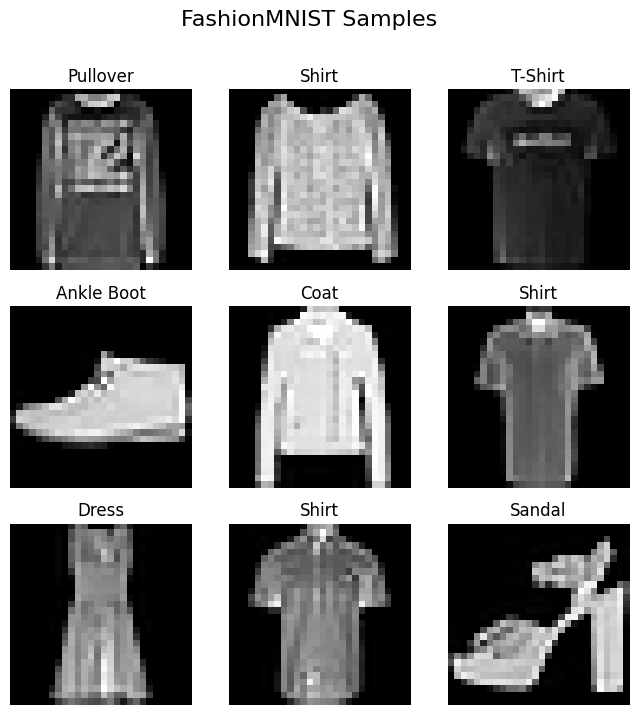

In [69]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
plt.suptitle("FashionMNIST Samples", fontsize=16)
for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [70]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self,idx):
    img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label



### DataLoader

DataLoader 实现结果是 将获取到的样本合成批次（batch）
过程是 从 数据集 中按照某种 采样策略 生成一系列 索引，然后根据这些索引从数据集中 取出样本，而后将这些样本合成批次

索引 → 数据集 → 样本 → 批次

整个训练流程：
Epoch → (批次 → (索引 → 数据集 → 样本 → 批次)) → 模型更新 → Epoch

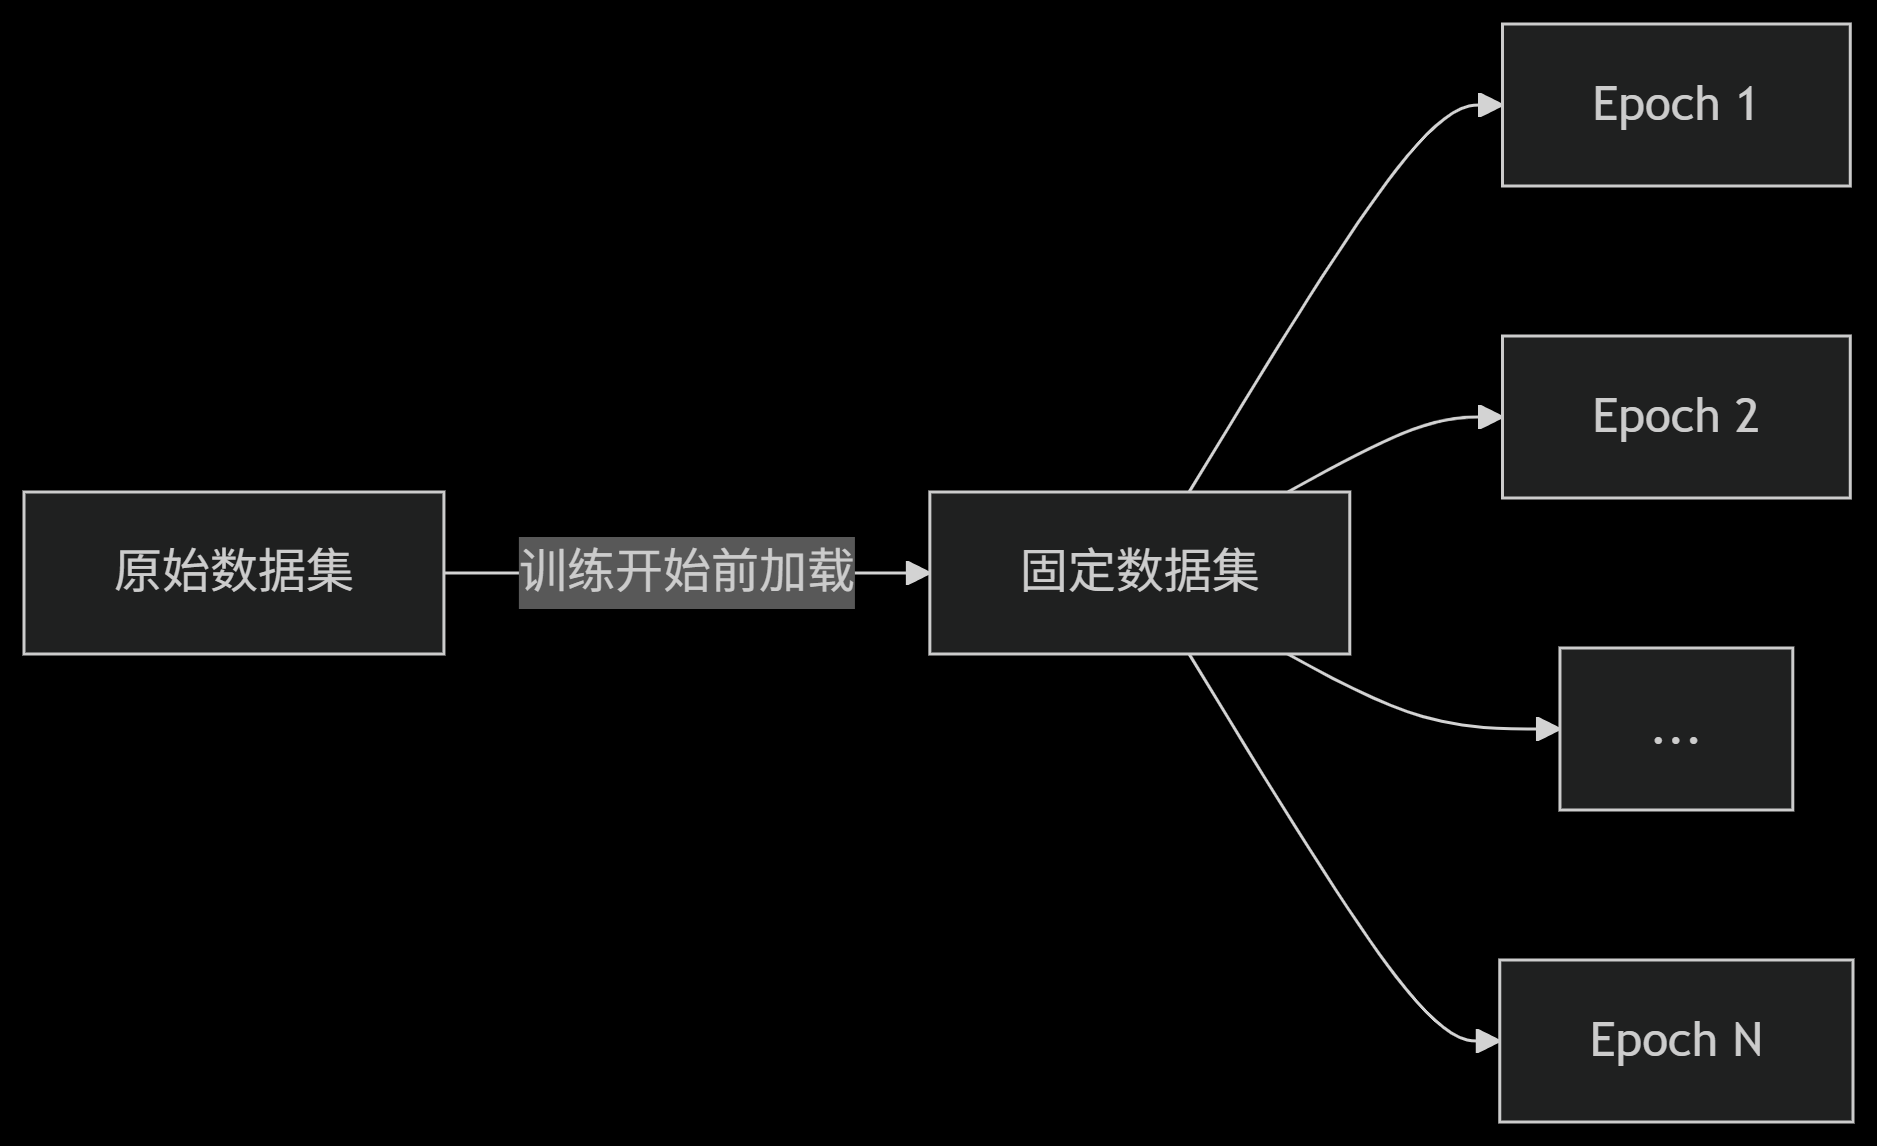

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


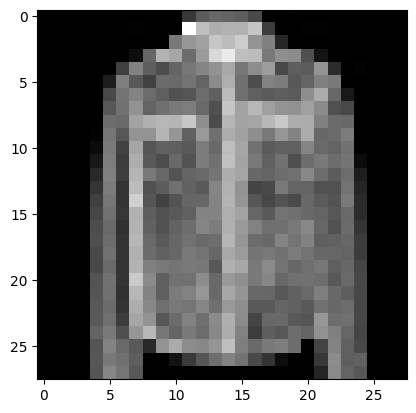

Label:6


In [71]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64,shuffle=True)

#展示图片和标签
#iter 创建迭代器 next 从迭代器中获取下一个批次的数据
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.shape}")
#从每一个批次中获取第一个样本
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label:{label}")

###涉及到专用名词 SGD（stochastic Gradient Descent）随机梯度下降

基本定义：是一种用于优化目标函数的迭代算法

核心思想和工作原理：

    目标：找到使损失函数J（θ）最小化的模型参数θ（例如权重和偏置） ？疑问点？
    梯度信息：算法利用损失函数关于参数 θ 的梯度∇J(θ)信息。梯度指向函数值增加最快的方向，因此其反方向指向下降最快的方向

    随机的本质：SGD和标准GD的区别核心：
      标准GD：在每次参数更新之前，计算整个训练数据集。这在大数据集上计算代价高昂
      SGD：在每次参数更新时，仅基于单个随机选择的训练样本（或非常小的随机子集，Minibatch SGD）计算梯度估计值∇J(θ; x⁽ⁱ⁾, y⁽ⁱ⁾)

  关键特点：计算高效 频繁更新 引入随机

    优点：逃离局部极小值  在线学习
    缺点：收敛路劲震荡 收敛速度变慢 对学习率敏感 不易并行化


##Transform

In [72]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

In [73]:
import torch
from torchvision.transforms import v2

H,W = 32,32
img = torch.randint(0,256,size=(3,H,W),dtype=torch.uint8)
print(f"init: {img}{img.shape}")

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224,224),antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32,scale=True),
    v2.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
])
img_1 = transforms(img)
print(f"tansforms: {img_1},{img.shape}")

init: tensor([[[112, 251, 189,  ...,  10, 233,  35],
         [192,  61, 135,  ..., 130,  83, 178],
         [146,  21, 119,  ..., 250,  54,  43],
         ...,
         [186,  51,   5,  ..., 139,  31, 228],
         [ 33,   9, 221,  ..., 167, 124,  84],
         [124, 130,  22,  ...,  21,  16, 174]],

        [[219, 188, 210,  ..., 246, 209, 184],
         [129, 238,  66,  ...,  97,  37,  54],
         [ 88, 154, 212,  ..., 136, 145,  31],
         ...,
         [  1, 186,  19,  ...,  13,  90,  32],
         [ 15, 235, 193,  ..., 106,  59, 210],
         [155, 138, 159,  ..., 226,  55,  47]],

        [[198,  69,  73,  ...,  44,  98, 117],
         [ 30, 197,  46,  ..., 153,  20, 244],
         [ 21, 213, 117,  ..., 210, 114,  24],
         ...,
         [ 41,  14,  52,  ...,  67, 104, 213],
         [134,  61,  83,  ..., 176, 157, 174],
         [ 56, 126, 152,  ...,  59, 161, 125]]], dtype=torch.uint8)torch.Size([3, 32, 32])
tansforms: tensor([[[ 0.5536,  0.5536,  0.5536,  ..., -0.0

##构建神经网络

神经网络----由层/模块组成，那是由什么样的模块和层组成呢----对数据执行操作的模块/层

In [74]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
#
#获取训练设备，当存在加速器（CUDA,MPS等）时,使用加速器，不存在时选择cpu
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
#print(torch.accelerator.current_accelerator())


Using cpu device


###定义类


In [75]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [76]:
#关于nn.Linear的完美解析  layer1 = nn.Linear(in_features=28*28, out_features=20)
# 你可以把这个线性层想象成一个处理单元，它接收一个包含 784 个数字的列表，
# 并通过一个复杂的数学运算（矩阵乘法和加法）将其转换为一个包含 20 个数字的新列表。

# 权重矩阵 (W): PyTorch 会在内部自动创建一个大小为 [out_features, in_features]，
# 即 [20, 784] 的权重矩阵。

# 偏置向量 (b): 同时，它还会创建一个大小为 [out_features]，即 [20] 的偏置向量。

# 计算: 当一个大小为 [batch_size, 784] 的输入张量 x 通过该层时，它会执行以下计算：
# y=x⋅W
# T
#  +b
# 这里的 W
# T
#   是权重矩阵的转置。计算后得到的输出 y 的大小为 [batch_size, 20]。

# 简而言之，layer1 学习如何将输入的 784 个像素特征组合和转换为 20 个更有意义
# 的抽象特征，这些新特征将帮助神经网络完成最终的任务（例如，图像分类）。

In [77]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [78]:
X = torch.rand(1,28,28,device=device)
logits = model(X)  #logits在

#样本和类别的关系是：每个样本属于一个类别，我们通过样本的特征来预测它所属的类别。

#Softmax() 将logits张量 沿着类别维度进行归一化操作 功能：指数化 归一化 输出概率分布
#Softmax() 功能事件模型输出的logits（一堆任意值）转换成一个概率分布，
#转换后的每个值都在0和1之间，并且所有值的总和为1
pred_probab_1 = nn.Softmax(dim=1)(logits)

#为什么是dim=1?
#  回顾logits的形状是（1,10），即（批量大小，类别数）
#  dim=0是批量维度，dim=1是类别维度
#  我们的目标是在所有类别之间计算概率，看看输入图片X属于每个类别的可能性是多少。
#  因此，我们必须沿着类别维度进行归一化

pred_probab_0 = nn.Softmax(dim=0)(logits)
y_pred = pred_probab_1.argmax(1)
print(f"pred probab dim=1: {pred_probab_1}")#这张图属于 10 个类别的预测概率
print(f"pred probab dim=0: {pred_probab_0}")
print(f"Predicted class: {y_pred}")

pred probab dim=1: tensor([[0.1028, 0.1009, 0.1076, 0.0995, 0.1099, 0.0956, 0.0898, 0.0997, 0.0990,
         0.0952]], grad_fn=<SoftmaxBackward0>)
pred probab dim=0: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([4])


###模型层

In [79]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [80]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
print(flat_image)

torch.Size([3, 784])
tensor([[0.3011, 0.9904, 0.0395,  ..., 0.4114, 0.3788, 0.8086],
        [0.5883, 0.4743, 0.8378,  ..., 0.9051, 0.3852, 0.5096],
        [0.9527, 0.8917, 0.4425,  ..., 0.3267, 0.5198, 0.6955]])


In [81]:
layer1=nn.Linear(in_features=28*28,out_features=20)
hidden1=layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [82]:
#nn.Sequential

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(f"input_image: {input_image}")
print(logits)

input_image: tensor([[[0.0043, 0.9222, 0.2425,  ..., 0.3202, 0.9619, 0.0490],
         [0.0663, 0.2717, 0.2006,  ..., 0.6424, 0.4597, 0.8548],
         [0.9341, 0.8942, 0.5215,  ..., 0.4008, 0.2373, 0.3529],
         ...,
         [0.3675, 0.8921, 0.1156,  ..., 0.5958, 0.0455, 0.7199],
         [0.7296, 0.9063, 0.1837,  ..., 0.0985, 0.1340, 0.9068],
         [0.1168, 0.6564, 0.1343,  ..., 0.3888, 0.1817, 0.5197]],

        [[0.9702, 0.6879, 0.3815,  ..., 0.7671, 0.1307, 0.2382],
         [0.2457, 0.3685, 0.1415,  ..., 0.0229, 0.9759, 0.4877],
         [0.0639, 0.4707, 0.8785,  ..., 0.5110, 0.1011, 0.6383],
         ...,
         [0.4680, 0.5972, 0.2394,  ..., 0.7754, 0.9055, 0.3889],
         [0.9738, 0.0290, 0.9522,  ..., 0.5956, 0.7104, 0.5448],
         [0.5554, 0.0054, 0.7306,  ..., 0.5885, 0.6885, 0.3018]],

        [[0.0204, 0.5937, 0.1634,  ..., 0.4100, 0.5140, 0.1128],
         [0.2339, 0.3266, 0.6465,  ..., 0.6006, 0.8634, 0.9765],
         [0.2222, 0.1905, 0.1121,  ..., 0.189

In [83]:
#nn.Softmax

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


In [84]:
#Model Parameters

print(f"Model structure: {model}\n\n")

for name,param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()}")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784])
Layer: linear_relu_stack.0.bias | Size: torch.Size([512])
Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512])
Layer: linear_relu_stack.2.bias | Size: torch.Size([512])
Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512])
Layer: linear_relu_stack.4.bias | Size: torch.Size([10])


In [85]:
import torch

x = torch.ones(5)#输入张量
y = torch.zeros(3)#预期输出
w = torch.randn(5,3,requires_grad = True)
b = torch.randn(3,requires_grad = True)

z = torch.matmul(x,w)+b
#通过真实输出值和预期输出经过损失函数得到损失值
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
print(loss)
#w和b是我们需要优化的参数

tensor(0.5431, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [86]:
print(f"Gradient function for z={z.grad_fn}")
print(f"Gradient function for loss={loss.grad_fn}")

Gradient function for z=<AddBackward0 object at 0x7b1b80150610>
Gradient function for loss=<BinaryCrossEntropyWithLogitsBackward0 object at 0x7b1b80153cd0>


###反向传播,计算权重和偏置的梯度

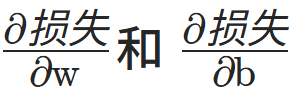

In [87]:
#反向传播,计算权重和偏置的梯度
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1836, 0.1120, 0.1141],
        [0.1836, 0.1120, 0.1141],
        [0.1836, 0.1120, 0.1141],
        [0.1836, 0.1120, 0.1141],
        [0.1836, 0.1120, 0.1141]])
tensor([0.1836, 0.1120, 0.1141])


###禁用梯度

您可能希望禁用梯度跟踪的原因如下：
将神经网络中的某些参数标记为冻结参数。

当您仅进行前向传递时，可以加快计算速度，因为不跟踪梯度的张量的计算会更有效率。

In [88]:
#当已经训练好模型，只是想应用于一些输入数据时（只进行向前传播（即只进行“执行"操作）
#不需要继续学习和修复），就需要停止梯度更新,

#停止梯度更新需要使用no_grad()方法

z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x,w)+b
print(z.requires_grad)

#另一种实现相同结果的方法是 detach()

z=torch.matmul(x,w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


In [89]:
inp = torch.eye(4,5,requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out),retain_graph=True)
print(f"First call\n{inp.grad}")

#当我们第二次调用相同的参数是，梯度的值会有所不同，因为在进行反向传播时，
#PyTorch会累计梯度（将第一次计算出的梯度值添加到grad计算图所有叶节点的属性中）
out.backward(torch.ones_like(out),retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

#如果要计算正确的梯度，需要将grad属性清零
inp.grad.zero_()
out.backward(torch.ones_like(out),retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")
#

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


###优化模型参数

通过优化模型参数来训练、验证和测试模型

In [98]:
#先决条件代码
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data,batch_size=64)
test_dataloader = DataLoader(test_data,batch_size=64)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork()

In [91]:
#Hyperparameters(超参数)--可调整的参数，用于控制模型优化过程

#超参数：
#number of epochs
#batch size
#learning rate

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [92]:
#优化循环 Optimization Loop

#训练循环和验证/测试循环

#损失函数 -- 用于回归任务的均方误差 用于分类的交叉熵
#初始化损失函数
loss_fn = nn.CrossEntropyLoss()

In [93]:
#Optimizer（优化器）

#优化 -- 在每个训练步骤中通过调整模型参数减少模型误差的过程
#优化算法如下：
#SGD -- 随机梯度下降
#ADAM
#RMSProp

#初始化优化器 通过注册要训练的模型参数和学习率来初始化优化器
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)




###训练循环
循环训练中，优化的三个步骤：

1 调用optimizer.zero_gra()方法重置模型参数的梯度。

   (梯度默认累加，防止重复计算，每次迭代时明确将其归零)

2 调用loss.backward()反向传播预测损失。
   PyTorch通过设置requires_grad=True来存储每个参数的损失梯度

3 一旦有了梯度，调用optimizer.step()方法通过在反向传输中收集到的梯度来调整参数

dropout 层 --- 防止模型过拟合的强大技术

    Dropout层的核心思想非常巧妙：强制网络不过分依赖任何一个神经元。

通过在训练过程的每一步中，随机地“关闭”或“丢弃”一部分神经元，来增强模型的泛化能力。

具体步骤：
  1随机选择：对于应用了dropout的层，其中的每一个神经元都有一个预设的概率p被暂时丢弃。

  2暂时关闭：被选中的神经元及其所有连接在这次正向传播和反向传播中都会被完全忽略，仿佛它们不存在一样。
  
  3恢复并重复：在下一步训练中，会重新随机选择一批神经元进行“丢弃”，而之前的神经元会恢复正常。

In [105]:
#定义train_loop和test_loop方法

def train_loop(dataloader,model,loss_fn,optimizer):
  size=len(dataloader.dataset) #数据集中所有样本数
  #将模型设置为训练模式--对于批量标准化和dropout层很重要
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    #计算预测值和损失
    pred=model(X)
    loss = loss_fn(pred,y)

    #batch -- 批次索引 batch index
    #batch size -- 批量大小
    #epoch -- 轮次 -- 批次索引一个循环未一个轮次

    #反向传播
    loss.backward() #预测损失，存储每个参数的损失梯度
    optimizer.step() #将收集到的梯度在反向传输中用于参数优化
    optimizer.zero_grad() #重置梯度，由于梯度默认累加，防止重复计算

    #使用closure函数
    #def closure():
    #  optimizer.zero_gred()
    #  pred = model(X)
    #  loss = loss_fn(pred,y)
    #  loss.backward()
    #  return loss
    #optimizer.step(closure)

    #日志输出
    if batch % 100 == 0:
      loss,current = loss.item(),batch * batch_size + len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader,model,loss_fn):
  #设置模型未评估测试模式 -- 对批次标准化和dropout层很重要
  model.eval()
  size = len(dataloader.dataset) #数据集中样本总数
  num_batches = len(dataloader) #一个数据集中产生的批次数（一个epoch中batch的数量）
  test_loss,correct = 0,0

  #使用torch.no_grad()评估模型可确保在测试模式下不计算梯度
  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred,y).item()

      #对当前batch的预测结果，与真实标签对比，（将张量元素中的布尔型true/false转为浮点型1.0/0.0），
      #统计有多少个预测是正确的，然后加到总计数correct上
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

      #y.shape --> y.Size(batch_size,)
      #pred.shape --> pred.Size(batch_size,num_classess)

      #是按批次进行比较，(X，y)这个元组，X和y都是第0维为batch_size的张量
      # 每次取一个小批次进行比较（batch_size = 64）

  test_loss /= num_batches #每个批次的平均损失 ---> 一个批次统计一次损失值
  correct /= size #准确率 ---> 预测正确的样本数 占 总样本数的 比例
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


####优化器（optimizer）使用`.step()`方法来更新参数。
可以通过两种方式来使用：

  1.一旦使用backward()方法计算梯度，就可以使用`.step()`方法
```
  for input, target in dataset:
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
```

  2.一些优化算法需要多次重新计算函数，因此必须传入一个闭包，允许他们重新计算模型。该闭包应该清除梯度，计算损失并返回结果。

  ```
  #optimizer.step(closure) 的作用: 当 step 方法接收到一个闭包时，
  #它的行为就变得强大得多了。它自己会调用这个 closure 函数，
  #通常会调用一次。但对于某些特殊的优化器，它可能会在一个 step 内多次调用 closure。


    for input,target in dataset:
      def closure():
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output,target)
        loss.backword()
        return loss
      optimizer.step(closure)

  ```

### “注册”是pytorch`nnModule`的一种特定行为，用于追踪和管理模型的参数和子模块

###注册为模型参数的方式（使用nn.Parameter()方法）

 方式一：使用 nn.Parameter 包装，会被自动注册

 `self.registered_param = nn.Parameter(torch.randn(2, 2))`

 方式二：一个普通的张量，不会被注册

 `self.normal_tensor = torch.randn(3, 3)`

 方式三：先定义普通张量，再包装成 Parameter (效果同方式一)

 `temp_tensor = torch.randn(4, 4)`

 `self.another_registered_param = nn.Parameter(temp_tensor)`


In [107]:
#初始化损失函数和优化器

loss_fn = nn.CrossEntropyLoss()

# .parameters()方法的核心功能：提供一种便捷的方式来访问模型中所有需要学习和更新的权重和偏置
# 这些参数正式神经网络在训练过程中，通过反向传播算法计算梯度并由优化器进行更新的对象
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

epochs = 16
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------")
  train_loop(train_dataloader,model,loss_fn,optimizer)
  test_loop(test_dataloader,model,loss_fn)
print("Done!")


Epoch 1
------------------------
loss: 0.534954 [   64/60000]
loss: 0.645732 [ 6464/60000]
loss: 0.433111 [12864/60000]
loss: 0.680051 [19264/60000]
loss: 0.591147 [25664/60000]
loss: 0.583283 [32064/60000]
loss: 0.616074 [38464/60000]
loss: 0.664739 [44864/60000]
loss: 0.652746 [51264/60000]
loss: 0.610485 [57664/60000]
Test Error: 
 Accuracy: 79.3%, Avg loss: 0.598976 

Epoch 2
------------------------
loss: 0.522678 [   64/60000]
loss: 0.633354 [ 6464/60000]
loss: 0.423717 [12864/60000]
loss: 0.671299 [19264/60000]
loss: 0.584225 [25664/60000]
loss: 0.577110 [32064/60000]
loss: 0.604359 [38464/60000]
loss: 0.660911 [44864/60000]
loss: 0.647635 [51264/60000]
loss: 0.600474 [57664/60000]
Test Error: 
 Accuracy: 79.6%, Avg loss: 0.590497 

Epoch 3
------------------------
loss: 0.511332 [   64/60000]
loss: 0.621959 [ 6464/60000]
loss: 0.415077 [12864/60000]
loss: 0.663064 [19264/60000]
loss: 0.577630 [25664/60000]
loss: 0.571294 [32064/60000]
loss: 0.593495 [38464/60000]
loss: 0.657931